In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import time, datetime
from scipy import signal
from pathlib import Path

In [4]:
filepath = Path('/Users/alexgonzalez/Google Drive/PostDoc/Data/T3g/Li/Li_T3g_060418_Results')

In [5]:
file = 'tt_1.npy'
data = np.load(str(filepath / file))

In [6]:
def retAbsGreater(a,b):
    return np.maximum(abs(a),abs(b))
        

In [7]:
maxInt16Val = 32767
minDatVal = np.min(data,0)
maxDatVal = np.max(data,0)

normFactor = maxInt16Val/retAbsGreater(minDatVal,maxDatVal)
print(normFactor)

[0.00182192 0.00604302 0.0016421  0.00173976]


In [46]:
dat3=np.zeros(np.shape(data),np.int16)
for ch in np.arange(4):
    dat3[:,ch] = np.floor(data[:,ch]*normFactor[ch])

In [47]:
dat3

array([[   0,    0,    0,   -1],
       [-238,  -90,  -52, -411],
       [-334, -105,   35, -540],
       ...,
       [-135,  -23, -470,  -24],
       [ -91,  -22, -342,   -2],
       [   2,    1,    4,    2]], dtype=int16)

In [49]:
file2 = 'tt_1.bin'
dat3.tofile(str(filepath / file2))

In [50]:
#load binary
dat4 = np.fromfile(str(filepath / file2),np.int16)
dat4=dat4.reshape(int(len(dat4)/4),4)

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       ...,
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int16)

In [35]:
dat3[:,1].tofile(str(filepath / file2))

In [36]:
dat4_ch1 = np.fromfile(str(filepath / file2),np.int16)

In [41]:
dat3.T.tofile(str(filepath / file2))

(array([38., 50., 40., 40., 42., 34., 24., 50., 36., 46.]),
 array([-0.99807739, -0.89837646, -0.79867554, -0.69897461, -0.59927368,
        -0.49957275, -0.39987183, -0.3001709 , -0.20046997, -0.10076904,
        -0.00106812]),
 <a list of 10 Patch objects>)

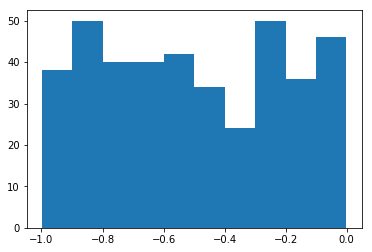

In [39]:
t=np.arange(400)+20000;ch=0; plt.hist(dat2[t,ch]-data[t,ch]/normFactor[ch]*maxInt16Val)

In [44]:
from scipy import signal

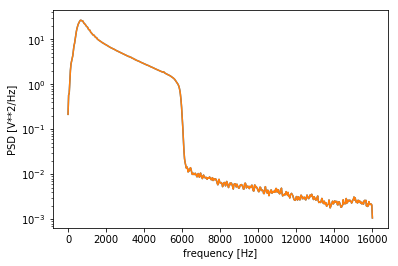

In [69]:
ch=1
fs=32000
f, Pxx_den1 = signal.welch(dat2[:,ch], fs, nperseg=1024)
f, Pxx_den0 = signal.welch(data[:,ch]/normFactor[ch]*maxInt16Val, fs, nperseg=1024)
plt.semilogy(f, Pxx_den0)
plt.semilogy(f, Pxx_den1)
#plt.ylim([0.5e-3, 1.01])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [70]:
f, Pxx_den_e = signal.welch(data[:,ch]/normFactor[ch]*maxInt16Val-dat2[:,ch], fs, nperseg=1024)

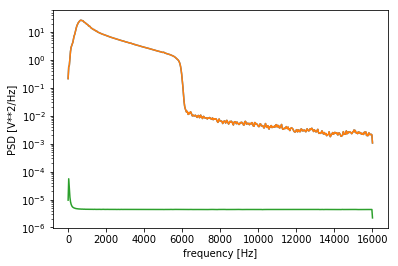

In [71]:
plt.semilogy(f, Pxx_den0)
plt.semilogy(f, Pxx_den1)
plt.semilogy(f, Pxx_den_e)
#plt.ylim([0.5e-3, 1.01])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

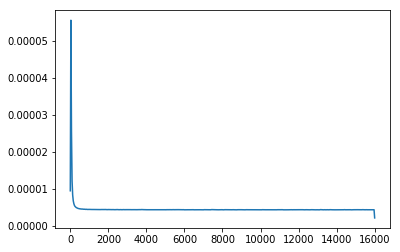

In [72]:
plt.plot(f,Pxx_den_e)

(array([5.0000000e+00, 5.0000000e+00, 2.8000000e+01, 6.0000000e+01,
        2.6400000e+02, 1.3406675e+07, 7.0941617e+07, 2.3200000e+02,
        3.0000000e+01, 1.2000000e+01]),
 array([-32568.98828125, -27171.40390625, -21773.81953125, -16376.23515625,
        -10978.65078125,  -5581.06640625,   -183.48203125,   5214.10234375,
         10611.68671875,  16009.27109375,  21406.85546875]),
 <a list of 10 Patch objects>)

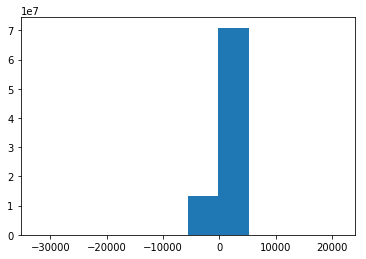

In [68]:
plt.hist(data[:,ch]-dat2[:,ch])

In [73]:
import sys

In [56]:
filepath

PosixPath('/Users/alexgonzalez/Google Drive/PostDoc/Data/T3g/Li/Li_T3g_060418_Results')

In [90]:
x=filepath / 'tt_2.npy'
(x.parent / str(x.stem +'.bin')).exists()

False

In [71]:
for i in filepath.glob('*.npy'):
    print(i)

/Users/alexgonzalez/Google Drive/PostDoc/Data/T3g/Li/Li_T3g_060418_Results/tt_3.npy
/Users/alexgonzalez/Google Drive/PostDoc/Data/T3g/Li/Li_T3g_060418_Results/tt_1.npy
/Users/alexgonzalez/Google Drive/PostDoc/Data/T3g/Li/Li_T3g_060418_Results/time_stamps.npy


In [78]:
for i in filepath.parent.glob('*_Results'):
    print(i)

/Users/alexgonzalez/Google Drive/PostDoc/Data/T3g/Li/Li_T3g_060418_Results
/Users/alexgonzalez/Google Drive/PostDoc/Data/T3g/Li/Li_T3g_062718_Results
